# 🏡 **California Housing Price Prediction Model** 📈💰
- Name : Dur e yashfeen 
- Email : dureyashfeen@gmail.com
- Date : 30-12-24

**Meta Data for California Housing Price Prediction Model**

This dataset, created by **Cam Nugent**, provides valuable insights into housing prices across various districts in California, based on 1990 U.S. census data. It includes attributes such as median income, house age, average rooms, and population statistics, which are crucial for predicting housing values.

- **Dataset Link:** [California Housing Prices Dataset](https://www.kaggle.com/camnugent/california-housing-prices) 📊
- **Creator:** Cam Nugent 👤
- **Description:** The dataset contains aggregated data on housing characteristics in California, making it suitable for regression analysis to predict median house values.
- **Attributes Include:**
  - Median Income (MedInc)
  - House Age (HouseAge)
  - Average Rooms (AveRooms)
  - Average Bedrooms (AveBedrms)
  - Population
  - Average Occupancy (AveOccup)
  - Latitude
  - Longitude
  - Median House Value (MedHouseVal)

This dataset serves as an essential resource for machine learning projects focused on real estate and economic analysis in California.


This Jupyter Notebook outlines the process of building a California housing price prediction model using various regression techniques. The dataset used is derived from the 1990 U.S. Census and includes various attributes related to housing in California.

## Table of Contents
1. **Import Libraries** 📚
2. **Load Dataset** 📂
3. **Data Preprocessing** 🔄
4. **Exploratory Data Analysis (EDA)** 🔍
5. **Model Training** 🏋️‍♂️
   - Linear Regression
   - Decision Tree Regression
   - Random Forest Regression
6. **Model Evaluation** 📊
7. **Conclusion** 🎉



## 1. Import Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



## 2. Load Dataset 📂


In [2]:
df = pd.read_csv("./data/housing.csv")

In [4]:
#('/kaggle/input/california-housing-prices/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000



## 3. Data Preprocessing 🔄


In [5]:
## 3. Data Preprocessing 🔄
#Handle missing values by filling with the mean of respective columns
df.fillna(df.mode(), inplace=True)
#Convert categorical data to numerical data if necessary (e.g., ocean_proximity)
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


## 4. Exploratory Data Analysis (EDA) 🔍


- Visualize correlations between features and target variable (median house value)

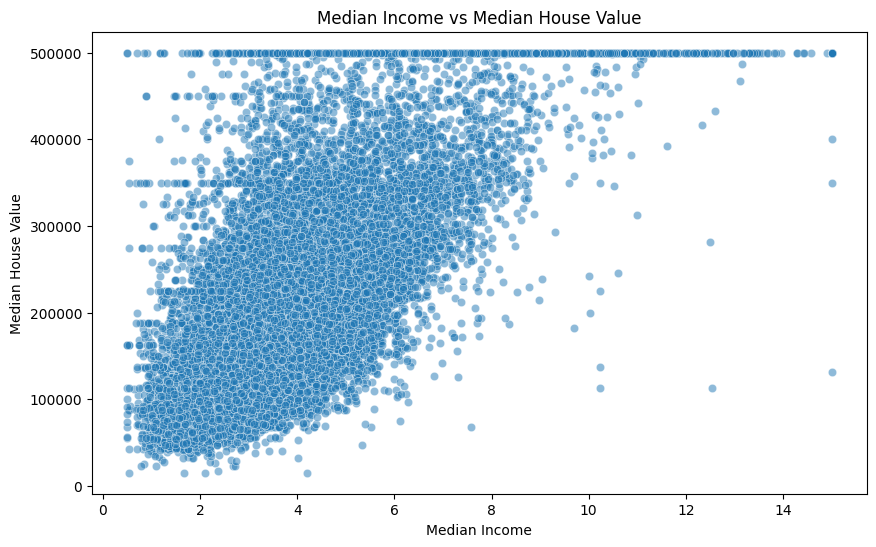

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already defined and contains the required columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


## 5. Model Training 🏋️‍♂️

### Linear Regression


In [9]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


In [10]:
#Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [17]:
print(X_test.isnull().sum())

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64


In [18]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Ensure y_test is aligned with X_test

In [19]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy
imputer = SimpleImputer(strategy='mean')  # You can use 'median', 'most_frequent', etc.

# Fit the imputer on the training data (X_train)
imputer.fit(X_train)

# Transform both training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [20]:
#Predict and evaluate the model
# Fit the model again if necessary
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression RMSE:", rmse)

Linear Regression RMSE: 69503.58476936349



### Decision Tree Regression


In [21]:
#Train Decision Tree model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor()

In [22]:
#Predict and evaluate the model
y_pred_tree = tree_reg.predict(X_test)
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))

Decision Tree RMSE: 69256.01313761256



### Random Forest Regression


In [23]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

### Predict and evaluate the model

In [24]:
y_pred_forest = forest_reg.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_forest)))

Random Forest RMSE: 48897.591060887964



## 6. Model Evaluation 📊

- Evaluate each model using metrics such as RMSE and R² score to determine performance.



In [25]:
print("R² Score for Linear Regression:", r2_score(y_test, y_pred))
print("R² Score for Decision Tree:", r2_score(y_test, y_pred_tree))
print("R² Score for Random Forest:", r2_score(y_test, y_pred_forest))

R² Score for Linear Regression: 0.6323937514207205
R² Score for Decision Tree: 0.6350079127587507
R² Score for Random Forest: 0.8180536264645712


## 7. Conclusion 🎉

This notebook demonstrates how to build a predictive model for California housing prices using various regression techniques. Further improvements can be made through hyperparameter tuning and feature engineering.

---


